# SVI minibatch variation

In [1]:
from pCMF.misc import utils
from pCMF.models.pcmf import cavi, svi

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from scipy.stats import gamma

import operator
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Experiment parameters
N = 1000 # number of observations
P = 20 # observation space dimensionality
K = 10 # latent space dimensionality
C = 2 # number of clusters

# Generate data set
z_p = 0.5
eps = 5.
Y, D, X, R, V, U, clusters = utils.generate_data(N, P, K, C=C, zero_prob=z_p,
                                                 eps=eps, return_all=True)

Y_train, Y_test, U_train, U_test, c_train, c_test = train_test_split(Y, U.T, clusters, test_size=0.2, random_state=42)

In [3]:
T = 60.
S = 1.

In [4]:
# Run PCA
pca_U = PCA(n_components=K).fit_transform(np.log(Y_train + 1.))
pca_tsne = TSNE(n_components=2).fit_transform(pca_U)

In [5]:
# Run CAVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('CAVI:')
infcavi = cavi.CoordinateAscentVI(Y_train, alpha, beta, pi_D)
cavi_ll = infcavi.run_cavi(n_iterations=4000, empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
cavi_U = infcavi.a[0] / infcavi.a[1] # VI estimate is the mean of the variational approximation
cavi_V = infcavi.b[0] / infcavi.b[1]
cavi_tsne = TSNE(n_components=2).fit_transform(cavi_U)

CAVI:
Iteration 57/4000. Log-likelihood: 29.083. Elapsed: 61 seconds


In [6]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('SVI-1:')
infsvi1 = svi.StochasticVI(Y_train, alpha, beta, pi_D)
svi1_ll = infsvi1.run_svi(n_iterations=4000000, minibatch_size=1, empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
svi1_U = infsvi1.a[0] / infsvi1.a[1] # VI estimate is the mean of the variational approximation
svi1_V = infsvi1.b[0] / infsvi1.b[1]
svi1_tsne = TSNE(n_components=2).fit_transform(svi1_U)

SVI-1:
Iteration 16231/4000000. Log-likelihood: 27.152. Elapsed: 60 seconds


In [7]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('SVI-50:')
infsvi50 = svi.StochasticVI(Y_train, alpha, beta, pi_D)
svi50_ll = infsvi50.run_svi(n_iterations=4000000, minibatch_size=50, empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
svi50_U = infsvi50.a[0] / infsvi50.a[1] # VI estimate is the mean of the variational approximation
svi50_V = infsvi50.b[0] / infsvi50.b[1]
svi50_tsne = TSNE(n_components=2).fit_transform(svi50_U)

SVI-50:
Iteration 663/4000000. Log-likelihood: 29.567. Elapsed: 60 seconds


In [8]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('SVI-100:')
infsvi100 = svi.StochasticVI(Y_train, alpha, beta, pi_D)
svi100_ll = infsvi100.run_svi(n_iterations=4000, minibatch_size=100, empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
svi100_U = infsvi100.a[0] / infsvi100.a[1] # VI estimate is the mean of the variational approximation
svi100_V = infsvi100.b[0] / infsvi100.b[1]
svi100_tsne = TSNE(n_components=2).fit_transform(svi100_U)

SVI-100:
Iteration 343/4000. Log-likelihood: 27.881. Elapsed: 60 seconds


In [9]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('SVI-500:')
infsvi500 = svi.StochasticVI(Y_train, alpha, beta, pi_D)
svi500_ll = infsvi500.run_svi(n_iterations=4000, minibatch_size=500, empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
svi500_U = infsvi500.a[0] / infsvi500.a[1] # VI estimate is the mean of the variational approximation
svi500_V = infsvi500.b[0] / infsvi500.b[1]
svi500_tsne = TSNE(n_components=2).fit_transform(svi500_U)

SVI-500:
Iteration 69/4000. Log-likelihood: 29.048. Elapsed: 60 seconds


In [10]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('SVI-1000:')
infsvi1000 = svi.StochasticVI(Y_train, alpha, beta, pi_D)
svi1000_ll = infsvi1000.run_svi(n_iterations=4000, minibatch_size=Y_train.shape[0], empirical_bayes=False, return_ll=True, sampling_rate=S, max_time=T)
svi1000_U = infsvi1000.a[0] / infsvi1000.a[1] # VI estimate is the mean of the variational approximation
svi1000_V = infsvi1000.b[0] / infsvi1000.b[1]
svi1000_tsne = TSNE(n_components=2).fit_transform(svi1000_U)

SVI-1000:
Iteration 43/4000. Log-likelihood: 28.019. Elapsed: 61 seconds


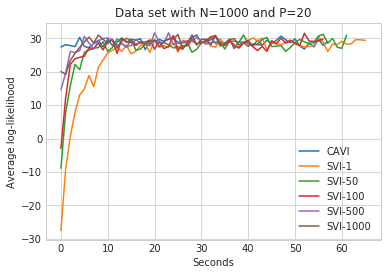

In [11]:
plt.plot(cavi_ll[1], label='CAVI')
plt.plot(svi1_ll[1], label='SVI-1')
plt.plot(svi50_ll[1], label='SVI-50')
plt.plot(svi100_ll[1], label='SVI-100')
plt.plot(svi500_ll[1], label='SVI-500')
plt.plot(svi1000_ll[1], label='SVI-1000')
plt.ylabel('Average log-likelihood')
plt.xlabel('Seconds')
plt.title('Data set with N={} and P={}'.format(N, P))
plt.legend()
plt.show()

In [12]:
cavi_dll = utils.log_likelihood(Y_train, cavi_U, cavi_V, infcavi.p)
svi1_dll = utils.log_likelihood(Y_train, svi1_U, svi1_V, infsvi1.p)
svi50_dll = utils.log_likelihood(Y_train, svi50_U, svi50_V, infsvi50.p)
svi100_dll = utils.log_likelihood(Y_train, svi100_U, svi100_V, infsvi100.p)
svi500_dll = utils.log_likelihood(Y_train, svi500_U, svi500_V, infsvi500.p)
svi1000_dll = utils.log_likelihood(Y_train, svi1000_U, svi1000_V, infsvi1000.p)

scores = {'CAVI': cavi_dll, 'SVI-1': svi1_dll, 'SVI-50': svi50_dll, 'SVI-100': svi100_dll, 'SVI-500': svi500_dll, 'SVI-1000': svi1000_dll}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Full data log-likelihood:')
print('\033[1m- {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
for score_tp in sorted_scores[1:]:
    print('- {0}: {1:.3}'.format(score_tp[0], score_tp[1]))

Full data log-likelihood:
- CAVI: 29.1
- SVI-1000: 28.8
- SVI-500: 28.8
- SVI-100: 28.7
- SVI-1: 28.7
- SVI-50: 28.6


In [13]:
cavi_holl = infcavi.predictive_ll(Y_test)
svi1_holl = infsvi1.predictive_ll(Y_test)
svi50_holl = infsvi50.predictive_ll(Y_test)
svi100_holl = infsvi100.predictive_ll(Y_test)
svi500_holl = infsvi500.predictive_ll(Y_test)
svi1000_holl = infsvi1000.predictive_ll(Y_test)

scores = {'CAVI': cavi_holl, 'SVI-1': svi1_holl, 'SVI-50': svi50_holl, 'SVI-100': svi100_holl, 'SVI-500': svi500_holl, 'SVI-1000': svi1000_holl}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Held-out log-likelihood:')
print('\033[1m- {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
for score_tp in sorted_scores[1:]:
    print('- {0}: {1:.3}'.format(score_tp[0], score_tp[1]))

Held-out log-likelihood:
- CAVI: 27.8
- SVI-1000: 27.5
- SVI-500: 27.5
- SVI-100: 27.3
- SVI-1: 27.3
- SVI-50: 27.3


In [14]:
true_silh = silhouette_score(U_train, c_train)
cavi_silh = silhouette_score(cavi_U, c_train)
svi1_silh = silhouette_score(svi1_U, c_train)
svi50_silh = silhouette_score(svi50_U, c_train)
svi100_silh = silhouette_score(svi100_U, c_train)
svi500_silh = silhouette_score(svi500_U, c_train)
svi1000_silh = silhouette_score(svi1000_U, c_train)
pca_silh = silhouette_score(pca_U, c_train)

scores = {'CAVI': cavi_silh, 'SVI-1': svi1_silh, 'SVI-50': svi50_silh, 'SVI-100': svi100_silh, 
          'SVI-500': svi500_silh, 'SVI-1000': svi1000_silh, 'PCA': pca_silh}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Silhouette scores (higher is better):')
print('\033[1m- {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
for score_tp in sorted_scores[1:]:
    print('- {0}: {1:.3}'.format(score_tp[0], score_tp[1]))
    
print('\nSilhouette of true U:')
print('%0.3f' % true_silh)

Silhouette scores (higher is better):
- CAVI: 0.161
- SVI-500: 0.109
- SVI-100: 0.0894
- SVI-1: 0.0868
- SVI-1000: 0.0651
- SVI-50: 0.0422
- PCA: 0.00171

Silhouette of true U:
0.551


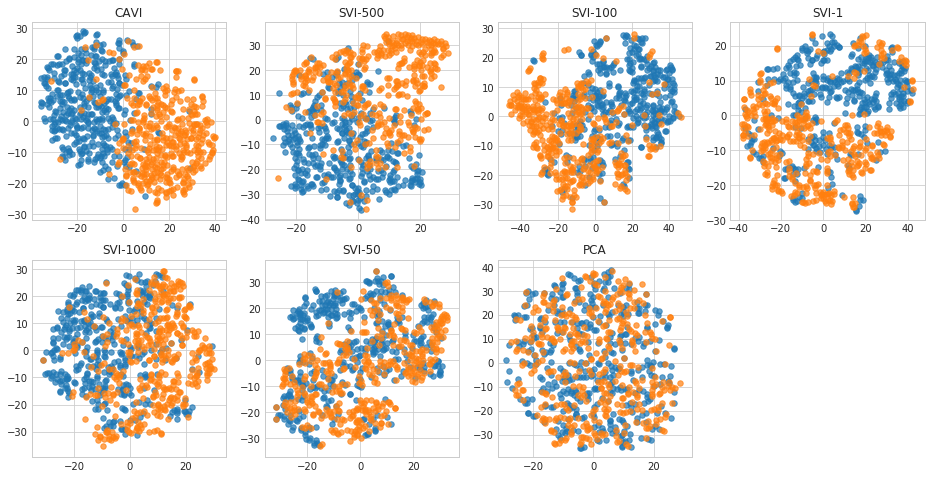

In [15]:
U_list = [cavi_tsne, svi1_tsne, svi50_tsne, svi100_tsne, svi500_tsne, svi1000_tsne, pca_tsne]
title_list = ['CAVI', 'SVI-1', 'SVI-50', 'SVI-100', 'SVI-500', 'SVI-1000', 'PCA']

n_results = len(U_list)

assert len(U_list) == len(title_list)

fig = plt.figure(figsize=(16, 8))

s = 30
alpha = 0.7
labels=None
for i in range(len(U_list)):
    ax = plt.subplot(2, 4, i+1)
    handlers = []
    for c in range(C):
        h = ax.scatter(U_list[title_list.index(sorted_scores[i][0])][c_train==c, 0], U_list[title_list.index(sorted_scores[i][0])][c_train==c, 1], s=s, alpha=alpha)
        handlers.append(h)
    if labels is not None:
        ax.legend(handlers, labels, scatterpoints=1)
    plt.title(sorted_scores[i][0])
plt.show()